In [1]:
!pip install imblearn

In [3]:
import tensorflow as tf
import tensorflow.keras.layers as Layers
import tensorflow.keras.models as Models
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from tensorflow import keras
import matplotlib.pyplot as plot
import numpy as np
from sklearn.model_selection import train_test_split
# from imblearn.over_sampling import BorderlineSMOTE
import random
np.random.seed(42)
tf.set_random_seed(42)
random.seed(42)

In [2]:
np_Images = np.load('./dataset/Image_224.npy') #converting the list of images to numpy array.
np_Labels = np.load('./dataset/Label_224.npy')

In [3]:
print("Shape of Images:",np_Images.shape)
print("Shape of Labels:",np_Labels.shape)

Shape of Images: (16785, 224, 224, 3)
Shape of Labels: (16785,)


In [4]:
np.bincount(np_Labels)

array([9955,  229,  766, 2061,  426, 3348])

In [2]:
from sklearn.model_selection import train_test_split

In [6]:
len(np_Images)

16785

In [7]:
X_train_tmp, X_test, y_train_tmp, y_test = train_test_split(np_Images, np_Labels, test_size=0.1, random_state=1, stratify=np_Labels)

In [8]:
X_train_tmp_1, X_val, y_train, y_val = train_test_split(X_train_tmp, y_train_tmp, test_size=0.11, random_state=1 ,stratify=y_train_tmp)

In [9]:
np.bincount(y_train)

array([7973,  183,  613, 1651,  342, 2682])

In [10]:
X_train_smote = X_train_tmp_1.reshape((X_train_tmp_1.shape[0], X_train_tmp_1.shape[1] * X_train_tmp_1.shape[2] * X_train_tmp_1.shape[3])).astype(np.float32)

In [11]:
smote = BorderlineSMOTE(n_jobs=8)
X_train, y_train = smote.fit_resample(X_train_smote, y_train)

In [18]:
len(X_train), len(y_train)

(47838, 47838)

In [13]:
np.bincount(y_train)

array([7973, 7973, 7973, 7973, 7973, 7973])

In [ ]:
X_train = X_train.reshape((-1, np_Images.shape[1], np_Images.shape[2], np_Images.shape[3])).astype(np.float32)

In [15]:
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

In [4]:
X_train = np.load('X_train.npy')
y_train = np.load('y_train.npy')
X_val = np.load('X_val.npy')
y_val = np.load('y_val.npy')
X_test = np.load('X_test.npy')
y_test = np.load('y_test.npy')

In [5]:
X_train=tf.keras.applications.resnet50.preprocess_input(X_train)
X_test=tf.keras.applications.resnet50.preprocess_input(X_test)
X_val=tf.keras.applications.resnet50.preprocess_input(X_val)

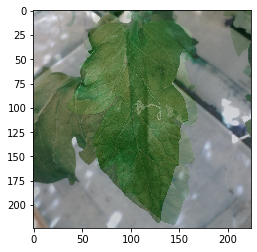

In [12]:
plot.imshow(X_train[47837]/255)
plot.show()

In [35]:
list_1 = []
for idx, label in enumerate(y_train):
    if label == 1:
        list_1.append(idx)

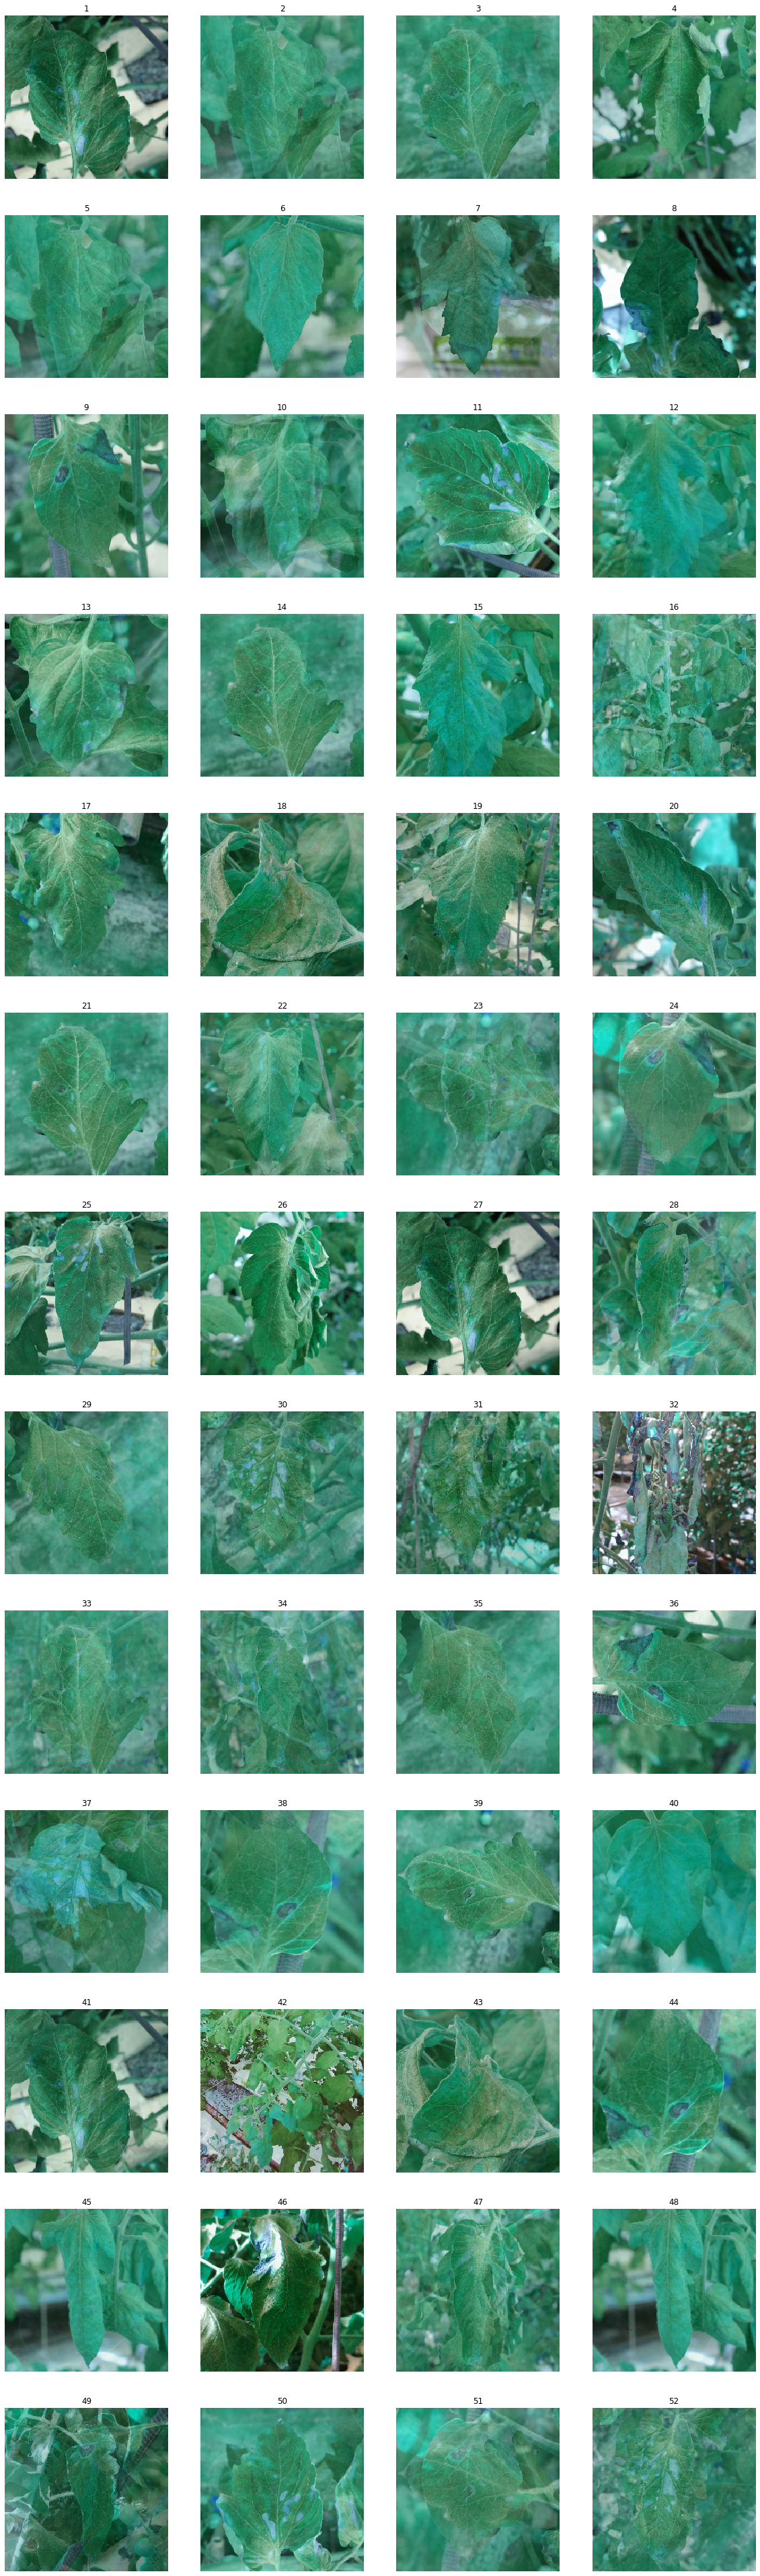

In [38]:
image_list = list_1[7000:7052]
plot.figure(figsize=(20,70))

for idx, img in enumerate(image_list):
    plot.subplot(13,4,idx+1)
    plot.imshow(X_train[img]/255)
    plot.title(idx+1)
    plot.axis("off")
plot.show()

In [68]:
X_train.shape, y_train.shape

((47838, 224, 224, 3), (47838,))

In [6]:
# Images = (Images / 127.5) -1

In [8]:
np.bincount(y_train)

array([7973, 7973, 7973, 7973, 7973, 7973])

In [9]:
names =  {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05',
              4: 'Tomato_D08', 5: 'Tomato_P03'}

In [23]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)
np.bincount(y_train),np.bincount(y_test)

(47838, 224, 224, 3) (1679, 224, 224, 3) (47838,) (1679,)


(array([7973, 7973, 7973, 7973, 7973, 7973]),
 array([996,  23,  77, 206,  42, 335]))

In [6]:
IMG_SHAPE = X_train[0].shape

base_model = tf.keras.applications.ResNet50(input_shape=IMG_SHAPE,
                                            include_top=False,   
                                            weights='imagenet')

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [7]:
base_model.trainable = True

In [24]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [25]:
# global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
# feature_batch_average = global_average_layer(feature_batch)
# print(feature_batch_average.shape)

In [26]:
# prediction_layer = keras.layers.Dense(6, activation='softmax')
# prediction_batch = prediction_layer(feature_batch)
# print(prediction_batch.shape)

(4, 6)


In [8]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(192, activation=None),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.ReLU(),
    tf.keras.layers.Dense(6, activation='softmax'),
])

In [10]:
base_learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  np.unique(y_train),
#                                                  y_train)
# class_weights

array([ 0.28102095, 12.22168285,  3.65408805,  1.3572327 ,  6.55642361,
        0.83560128])

In [39]:
# class_weight = {}

# for i in range(6):
#     class_weight[i] = class_weights[i]
    
# class_weight

{0: 0.2810209472783421,
 1: 12.22168284789644,
 2: 3.6540880503144653,
 3: 1.3572327044025156,
 4: 6.556423611111111,
 5: 0.8356012833278017}

In [40]:
# class_weight = [np.sqrt(np.sqrt(i)) for i in class_weights]
# class_weight

[0.7280893413081053,
 1.8697466010299983,
 1.3825942679304888,
 1.0793531890006298,
 1.6001723117077404,
 0.9560921987525172]

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
global_average_pooling2d (Gl (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 192)               393408    
_________________________________________________________________
batch_normalization (BatchNo (None, 192)               768       
_________________________________________________________________
re_lu (ReLU)                 (None, 192)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 1158      
Total params: 23,983,046
Trainable params: 23,929,542
Non-trainable params: 53,504
_______________________________________

In [12]:
model.trainable_variables

[<tf.Variable 'conv1_conv/kernel:0' shape=(7, 7, 3, 64) dtype=float32>,
 <tf.Variable 'conv1_conv/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv1_bn/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_conv/kernel:0' shape=(1, 1, 64, 64) dtype=float32>,
 <tf.Variable 'conv2_block1_1_conv/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_1_bn/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_2_conv/kernel:0' shape=(3, 3, 64, 64) dtype=float32>,
 <tf.Variable 'conv2_block1_2_conv/bias:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_2_bn/gamma:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_2_bn/beta:0' shape=(64,) dtype=float32>,
 <tf.Variable 'conv2_block1_0_conv/kernel:0' shape=(1, 1, 64, 256) dtype=float32>,
 <tf.Variable 'conv2_block1_0_conv/bias:0' shape=(256,) dtype=float32>,
 <tf.V

In [13]:
callback = [keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=0, mode='auto', baseline=None, restore_best_weights=False)]

In [16]:
trained = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val,y_val), callbacks=callback)

Train on 47838 samples, validate on 1662 samples
Epoch 1/20
47838/47838 [==============================] - 309s 6ms/sample - loss: 0.0562 - acc: 0.9834 - val_loss: 0.0328 - val_acc: 0.9880
Epoch 2/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0099 - acc: 0.9973 - val_loss: 0.0323 - val_acc: 0.9892
Epoch 3/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0062 - acc: 0.9985 - val_loss: 0.0353 - val_acc: 0.9886
Epoch 4/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0105 - acc: 0.9969 - val_loss: 0.0321 - val_acc: 0.9898
Epoch 5/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0063 - acc: 0.9983 - val_loss: 0.0380 - val_acc: 0.9880
Epoch 6/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0064 - acc: 0.9982 - val_loss: 0.0577 - val_acc: 0.9838
Epoch 7/20
47838/47838 [==============================] - 304s 6ms/sample - loss: 0.0025 - acc: 0.9993 - val_lo

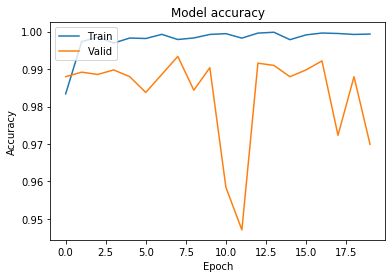

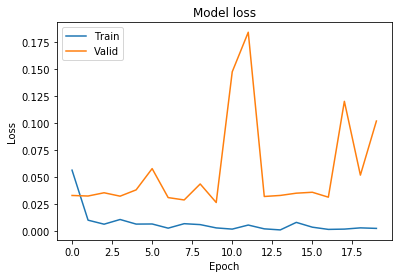

In [22]:
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Valid'], loc='upper left')
plot.show()

In [23]:
# test_images,test_labels = get_images('./test/')
# test_images = np.array(test_images)
# test_labels = np.array(test_labels)
model.evaluate(X_test,y_test, verbose=1)

1679/1679 [==============================] - 4s 2ms/sample - loss: 0.0879 - acc: 0.9762


[0.08785941688640087, 0.9761763]

In [24]:
pred = model.predict(X_test)

In [25]:
pred_0 = []
pred_1 = []
pred_2 = []
pred_3 = []
pred_4 = []
pred_5 = []
for i in range(len(pred)):
    a = np.argmax(pred[i]) == y_test[i]
    if y_test[i] == 0:
        pred_0.append(a)
    elif y_test[i] == 1:
        pred_1.append(a)
    elif y_test[i] == 2:
        pred_2.append(a)
    elif y_test[i] == 3:
        pred_3.append(a)
    elif y_test[i] == 4:
        pred_4.append(a)
    elif y_test[i] == 5:
        pred_5.append(a)
acc_0 = np.sum(pred_0) / len(pred_0)
acc_1 = np.sum(pred_1) / len(pred_1)
acc_2 = np.sum(pred_2) / len(pred_2)
acc_3 = np.sum(pred_3) / len(pred_3)
acc_4 = np.sum(pred_4) / len(pred_4)
acc_5 = np.sum(pred_5) / len(pred_5)

In [26]:
labels = {0: 'Tomato_H', 1: 'Tomato_D01', 2: 'Tomato_D04', 3: 'Tomato_D05',
              4: 'Tomato_D08', 5: 'Tomato_P03'}

print("{:10} 정확도 : {:.2f}%\t {:4} / {}\n\
{:10} 정확도 : {:.2f}%\t {:4} / {}\n\
{:10} 정확도 : {:.2f}%\t {:4} / {}\n\
{:10} 정확도 : {:.2f}%\t {:4} / {}\n\
{:10} 정확도 : {:.2f}%\t {:4} / {}\n\
{:10} 정확도 : {:.2f}%\t {:4} / {}\n".format(
 labels[0], acc_0 * 100, np.sum(pred_0), len(pred_0), 
 labels[1], acc_1 * 100, np.sum(pred_1), len(pred_1),
 labels[2], acc_2 * 100, np.sum(pred_2), len(pred_2),
 labels[3], acc_3 * 100, np.sum(pred_3), len(pred_3),
 labels[4], acc_4 * 100, np.sum(pred_4), len(pred_4),
 labels[5], acc_5 * 100, np.sum(pred_5), len(pred_5)))

Tomato_H   정확도 : 97.69%	  973 / 996
Tomato_D01 정확도 : 82.61%	   19 / 23
Tomato_D04 정확도 : 96.10%	   74 / 77
Tomato_D05 정확도 : 98.06%	  202 / 206
Tomato_D08 정확도 : 100.00%	   42 / 42
Tomato_P03 정확도 : 98.21%	  329 / 335



In [33]:
model.save('97_5_per_resnet50.h5')